In [1]:
import numpy as np
from sympy import *
import matplotlib.pyplot as plt


---
# Concept and uses of the inverse
---


[[ 1.5842458   0.24862868  0.38066824]
 [-0.85176317  0.52763531  1.61013667]
 [-0.7858523   1.35639942 -2.32400126]]
[[ 0.52534896 -0.16855583 -0.03072901]
 [ 0.49987109  0.52110124  0.44291253]
 [ 0.11410414  0.36113638 -0.16139632]]
[[ 1.00000000e+00  4.10247237e-17  1.09300375e-18]
 [-9.08073258e-19  1.00000000e+00 -2.58224282e-17]
 [-3.19395866e-17 -7.36386933e-18  1.00000000e+00]]


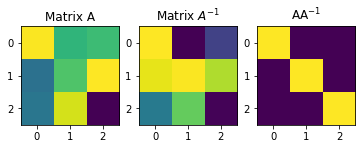

In [2]:
# size of square matrix
m = 3

# generate random matrix
A = np.random.randn(m,m)
print(A)

# compute its inverse
Ainv = np.linalg.inv(A)
print(Ainv)
# and check the multiplication
id = A@Ainv

# print the matrix. Note the computer rounding errors on the off-diagonals
print(id)


# show in an image
plt.subplot(131)
plt.imshow(A)
plt.title('Matrix A')

plt.subplot(132)
plt.imshow(Ainv)
plt.title('Matrix $A^{-1}$')

plt.subplot(133)
plt.imshow(id)
plt.title('AA$^{-1}$')

plt.show()


---
# Computing the inverse via row reduction
---


matrix a is: 
Matrix([[3.00000000000000, 11.0000000000000, -11.0000000000000], [1.00000000000000, 11.0000000000000, -2.00000000000000], [7.00000000000000, -19.0000000000000, 12.0000000000000]])


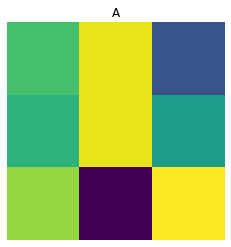

Size of Aaug: (3, 6)
Augmented matrix is : 
Matrix([[3.00000000000000, 11.0000000000000, -11.0000000000000, 1.00000000000000, 0.0, 0.0], [1.00000000000000, 11.0000000000000, -2.00000000000000, 0.0, 1.00000000000000, 0.0], [7.00000000000000, -19.0000000000000, 12.0000000000000, 0.0, 0.0, 1.00000000000000]])


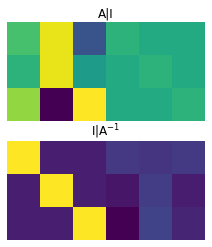

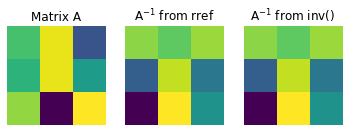

In [12]:
## notice the difference in implementation in this vsection using sympy, compared to the previous video using numpy ##

# matrix size
m = 3

# random integers matrix
A = Matrix( np.round(10*np.random.randn(m,m)),dtype='float' )
print("matrix a is: ", A , sep = '\n')

plt.subplot()
plt.imshow(matrix2numpy(A,dtype='float'))
plt.title('A'),plt.axis('off')
plt.show()

# augment A and identity
Aaug = Matrix( np.concatenate((A,np.eye(m,m)),axis=1) )
print('Size of Aaug:',Aaug.shape)
print("Augmented matrix is : ", Aaug, sep = '\n')


# rref
Asol = Aaug.rref()
Asol = Asol[0]
Ainvrref = Asol[:,m:m*2]
Ainv = A.inv()

# show the augemented matrices
plt.subplot(211)
plt.imshow(matrix2numpy(Aaug,dtype='float'))
plt.title('A|I'), plt.axis('off')

plt.subplot(212)
plt.imshow(matrix2numpy(Asol,dtype='float'))
plt.title('I|A$^{-1}$'), plt.axis('off')

plt.show()


# show the square matrices
plt.subplot(131)
plt.imshow(matrix2numpy(A,dtype='float'))
plt.title('Matrix A'), plt.axis('off')

plt.subplot(132)
plt.imshow(matrix2numpy(Ainvrref,dtype='float'))
plt.title('A$^{-1}$ from rref'), plt.axis('off')

plt.subplot(133)
plt.imshow(matrix2numpy(Ainv,dtype='float'))
plt.title('A$^{-1}$ from inv()'), plt.axis('off')

plt.show()


---
# Left inverse and right inverse
---


[[-1.81269933 -0.45207334 -0.35685297]
 [-0.22445865  0.53074909 -0.7576248 ]
 [-1.47054461  0.03963476  0.27365586]
 [-0.24232426  2.40013125 -0.38189054]
 [ 0.65361147 -0.95831038  1.79560991]
 [-0.49235225 -0.67687     0.43276527]]

[[ 6.22710175 -0.2326571   1.46759906]
 [-0.2326571   7.62477762 -3.16020354]
 [ 1.46759906 -3.16020354  4.33356802]]

[[ 3.61759321  0.43729919  2.55008251 -0.50949554 -1.39234323  1.0440479 ]
 [ 0.43729919  0.90607162  0.1437841   1.617589   -2.01572971 -0.57660912]
 [ 2.55008251  0.1437841   2.2389599   0.34697067 -0.50776806  0.81562712]
 [-0.50949554  1.617589    0.34697067  5.96519145 -3.14418305 -1.67053691]
 [-1.39234323 -2.01572971 -0.50776806 -3.14418305  4.56978169  1.10392208]
 [ 1.0440479  -0.57660912  0.81562712 -1.67053691  1.10392208  0.88784951]]
Rank of A^TA: 3
Rank of AA^T: 3


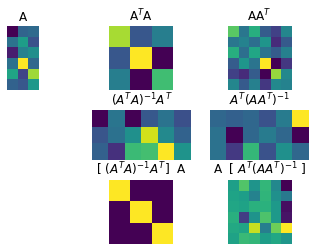

In [16]:
# m>n for left inverse,
# m<n for right inverse
m = 6
n = 3

# create matrices
A = np.random.randn(m,n)
AtA = np.matrix.transpose(A)@A
AAt = A@np.matrix.transpose(A)

print(A,AtA,AAt,sep='\n\n')

# inspect ranks
print('Rank of A^TA:', np.linalg.matrix_rank(AtA) ) 
print('Rank of AA^T:', np.linalg.matrix_rank(AAt) ) 

# left inverse
Aleft = np.linalg.inv(AtA)@np.matrix.transpose(A)

# right inverse
Aright = np.matrix.transpose(A)@np.linalg.inv(AAt)

# now test!
I_left  = Aleft  @ A
I_right = A @ Aright

# and then test using the inverse function
AtA_inv = np.linalg.inv(AtA)
I_AtA   = AtA_inv @ AtA

AAt_inv = np.linalg.inv(AAt)
I_AAt   = AAt_inv @ AAt


## show images
plt.subplot(331)
plt.imshow(A), plt.axis('off')
plt.title('A')

plt.subplot(332)
plt.imshow(AtA), plt.axis('off')
plt.title('A$^T$A')

plt.subplot(333)
plt.imshow(AAt), plt.axis('off')
plt.title('AA$^T$')

plt.subplot(335)
plt.imshow(Aleft), plt.axis('off')
plt.title('$(A^TA)^{-1}A^T$')

plt.subplot(336)
plt.imshow(Aright), plt.axis('off')
plt.title('$A^T(AA^T)^{-1}$')

plt.subplot(338)
plt.imshow(I_left), plt.axis('off')
plt.title('[ $(A^TA)^{-1}A^T ]$  A')

plt.subplot(339)
plt.imshow(I_right), plt.axis('off')
plt.title('A  [ $A^T(AA^T)^{-1}$ ]')

plt.show()


---
# The pseudoinverse, part 1
---


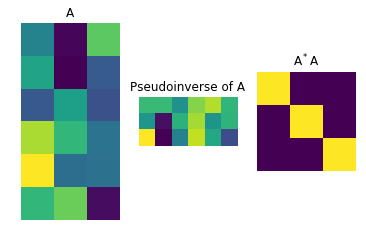

In [200]:
# pseudoinverse of rectangular matrix A

pseudoInvA = np.linalg.pinv(A)

plt.subplot(131)
plt.imshow(A), plt.axis('off')
plt.title('A')

plt.subplot(132)
plt.imshow(pseudoInvA), plt.axis('off')
plt.title('Pseudoinverse of A')

plt.subplot(133)
plt.imshow(pseudoInvA@A), plt.axis('off')
plt.title('A$^*$A')

plt.show()

rank = 49


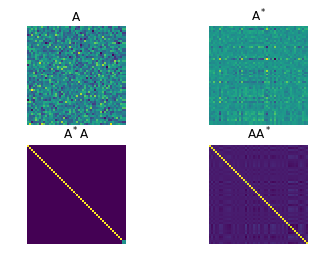

In [215]:

# create random matrix
n = 50
A = np.random.randn(n,n)

# make rank deficient by repeating a column
A[:,n-1] = A[:,n-2]

# rank of A!
print('rank =',np.linalg.matrix_rank(A))


# compute the pseudoinverse
Ai = np.linalg.pinv(A)


# and show the matrices
plt.subplot(221)
plt.imshow(A), plt.axis('off')
plt.title('A')

plt.subplot(222)
plt.imshow(Ai), plt.axis('off')
plt.title('A$^*$')

plt.subplot(223)
plt.imshow(Ai@A), plt.axis('off')
plt.title('A$^*$A')

plt.subplot(224)
plt.imshow(A@Ai), plt.axis('off')
plt.title('AA$^*$')

plt.show()